# Types Of Transformation

    1. Normalization And Standardization
    2. Scaling to Minimum And Maximum values
    3. Scaling To Median And Quantiles
    4. Guassian Transformation 
         (A) Logarithmic Transformation 
         (B) Reciprocal Trnasformation 
         (C) Square Root Transformation 
         (D) Exponential Trnasformation 
         (E) Box Cox Transformation

## 1. Normalization And Standardization

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('titanic.csv' ,usecols=['Pclass','Age','Fare','Survived'])
df.head(10)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
5,0,3,NaN,8.4583
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750
8,1,3,27.0,11.1333
9,1,2,14.0,30.0708


In [3]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [4]:
df.head(10)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
5,0,3,28.0,8.4583
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750
8,1,3,27.0,11.1333
9,1,2,14.0,30.0708


In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [13]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <BarContainer object of 20 artists>)

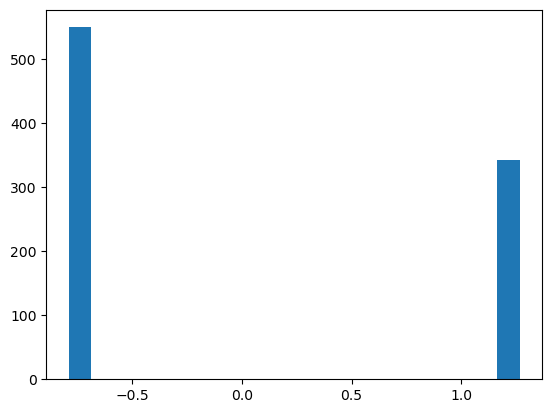

In [25]:
plt.hist(df_scaled[:,0],bins=20)

## 2. Scaling to Minimum And Maximum values

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

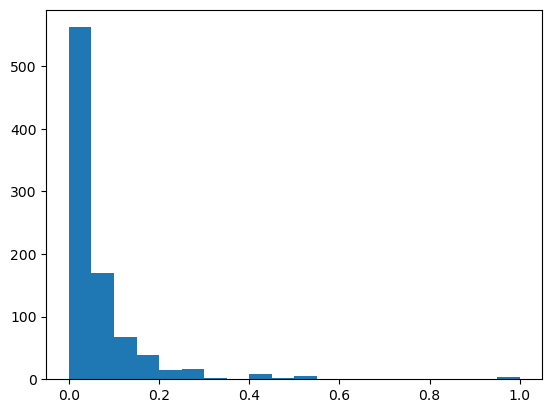

In [33]:
plt.hist(df_minmax['Fare'],bins=20)

## 3. Scaling To Median And Quantiles

In [34]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

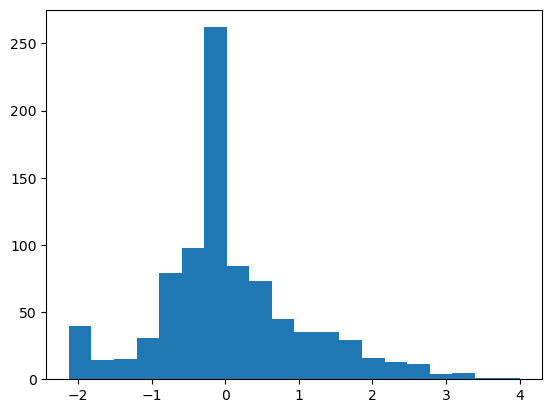

In [35]:
plt.hist(df_robust['Age'],bins=20)

## 4. Guassian Transformation 

In [36]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [37]:
df['Age']= df['Age'].fillna(df.Age.median())

In [38]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [39]:
import scipy.stats as stat
import pylab

In [41]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

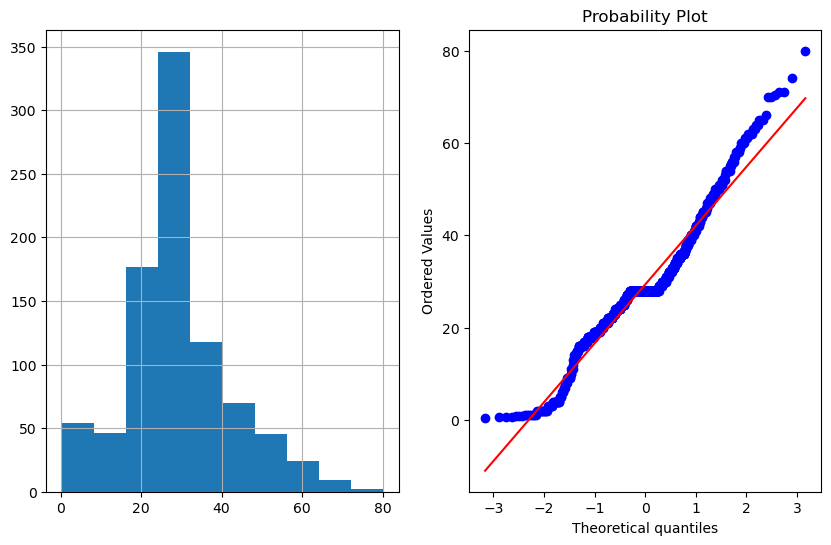

In [42]:
plot_data(df,'Age')

## (A) Logarithmic Transformation 

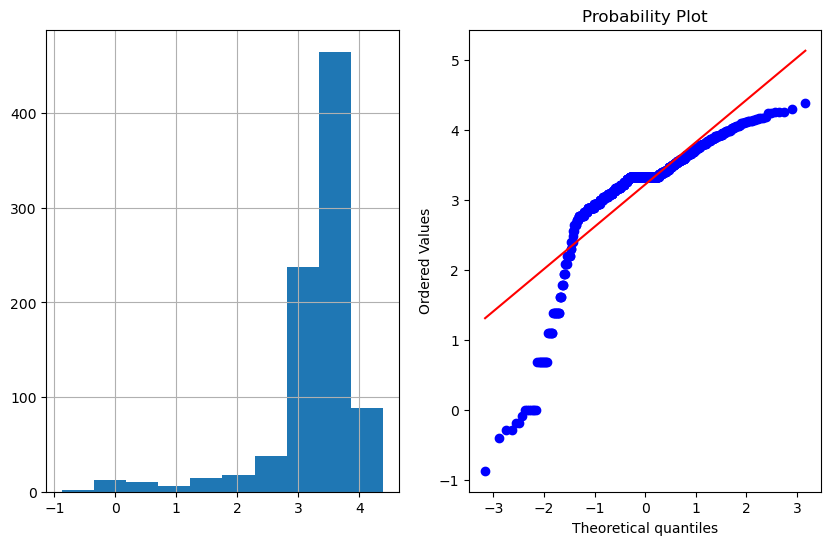

In [44]:
import numpy as np
df['Age_log']= np.log(df['Age'])
plot_data(df,'Age_log')

## (B) Reciprocal Trnasformation 

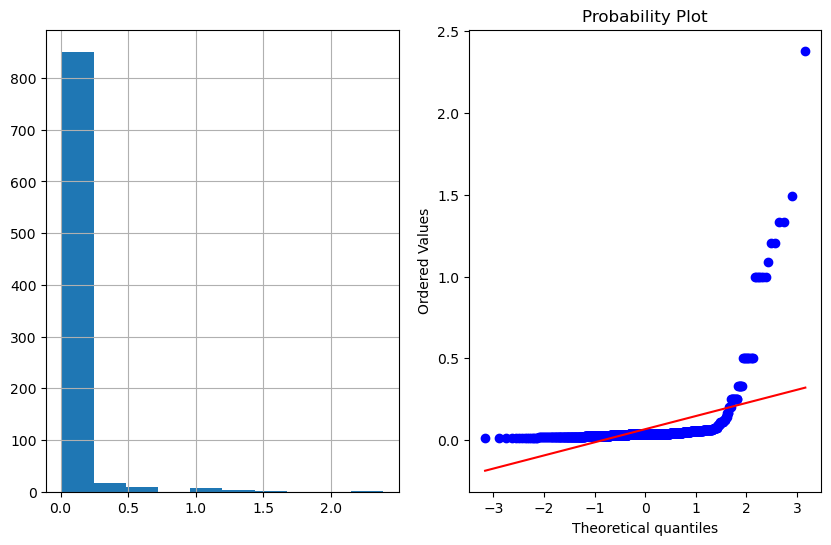

In [45]:
df['Age_resi']=1/df.Age
plot_data(df,'Age_resi')

## (C) Square Root Transformation 

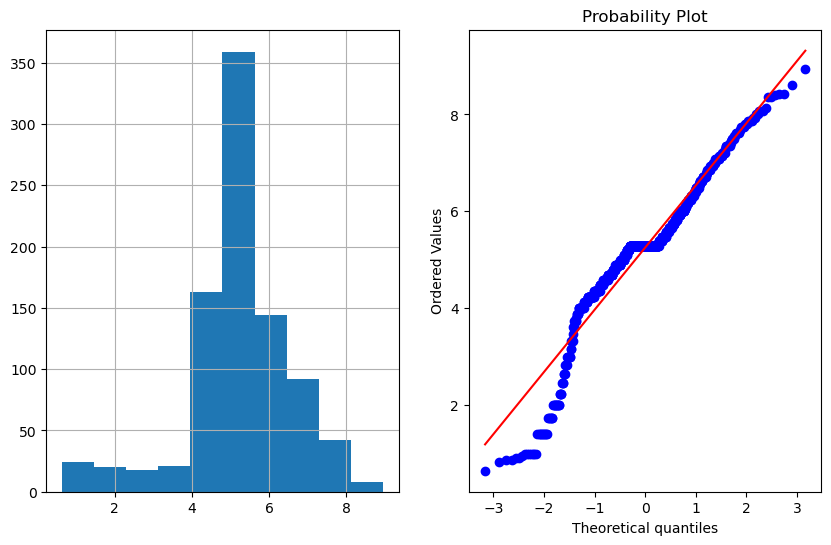

In [46]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

## (D) Exponential Trnasformation 

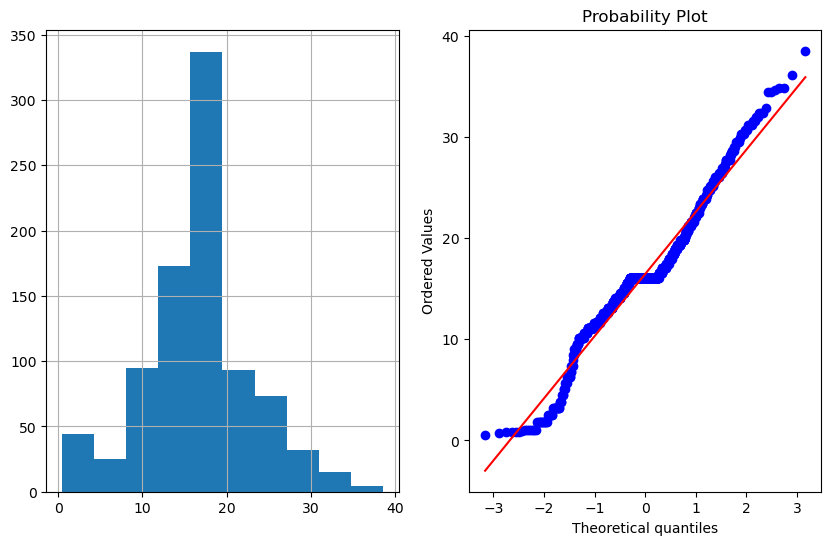

In [47]:
df['Age_expo']=df.Age**(1/1.2)
plot_data(df,'Age_expo')

## (E) Box Cox Transformation

In [48]:
df['Age_Box'] ,parameters=stat.boxcox(df.Age)

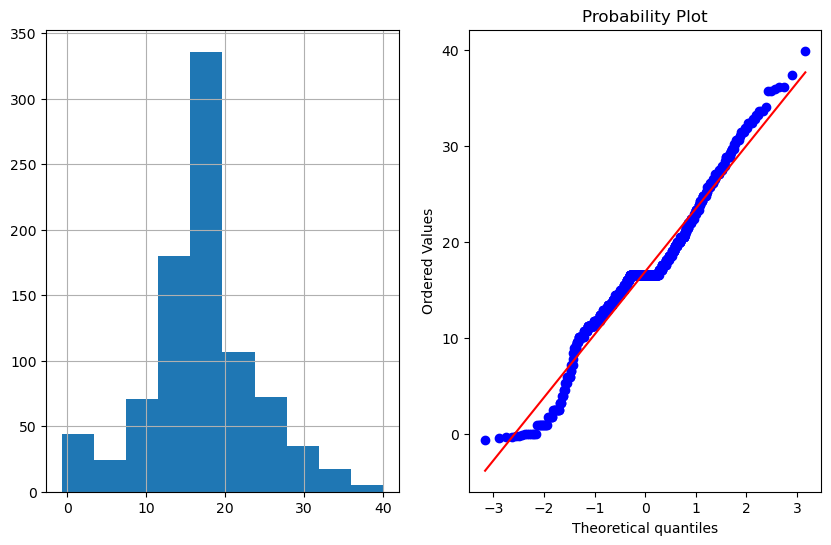

In [49]:
plot_data(df,'Age_Box')

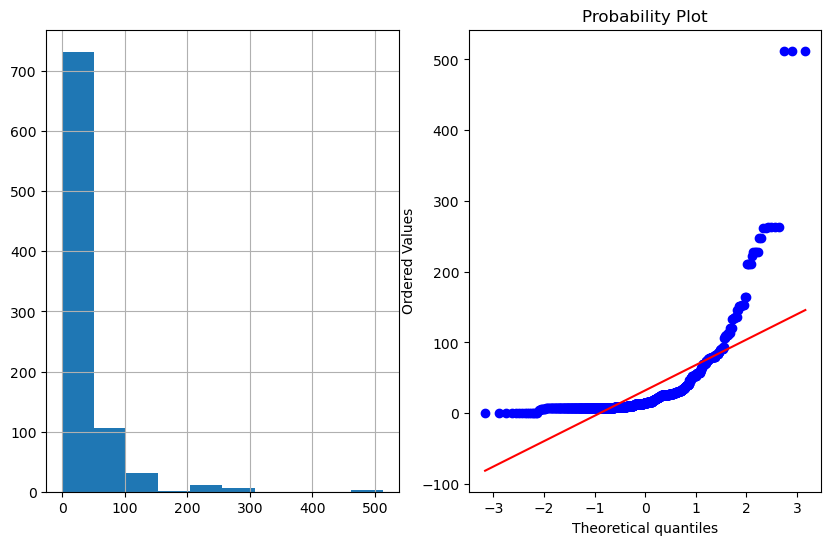

In [50]:
plot_data(df,'Fare')

##  Logarithmic Transformation      

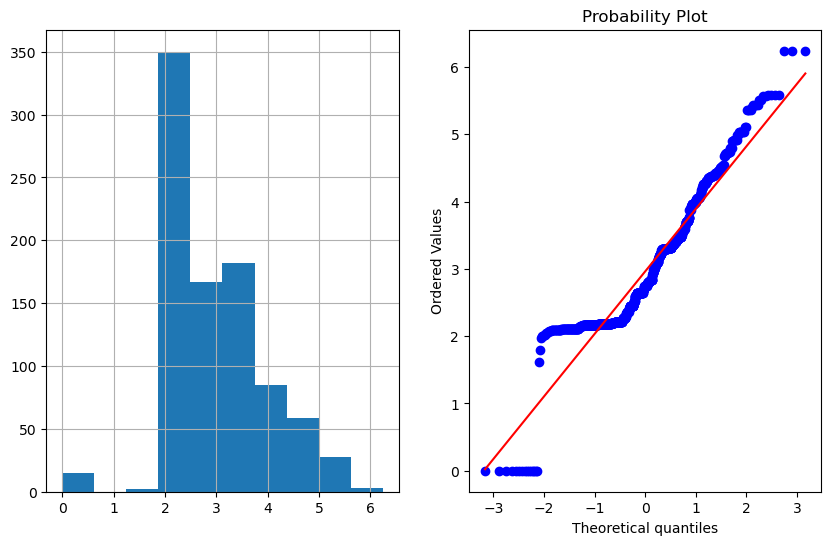

In [52]:
df['fare_log']=np.log(df['Fare']+1)
plot_data(df,'fare_log')

##  Box Cox Transformation

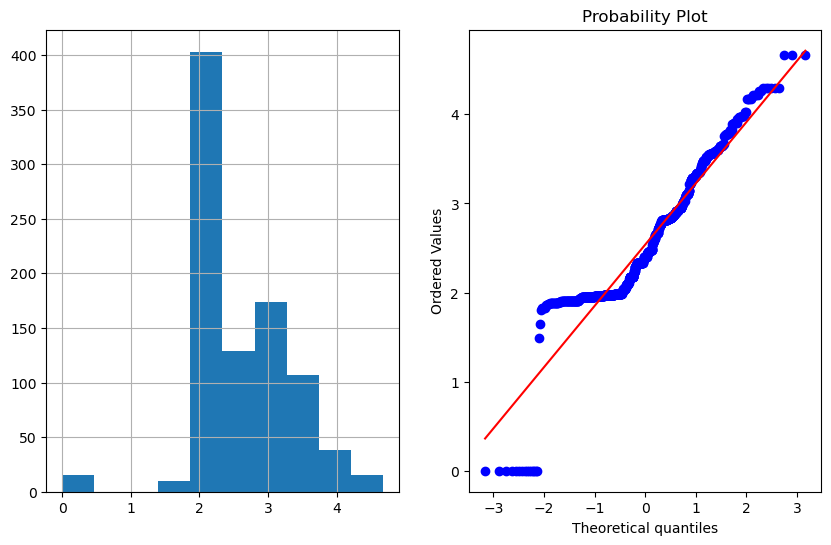

In [53]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')